# Dataset Analysis Project
Data source: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

## Dataset description
The dataset contains the following columns:

- Time_spent_Alone (0–11): Hours spent alone daily
- Stage_fear (Yes/No): Indicates whether the person has stage fright
- Social_event_attendance (0–10): Frequency of social events
- Going_outside (0–7): Frequency of going outside
- Drained_after_socializing (Yes/No): Feeling drained after socializing
- Friends_circle_size (0–15): Number of close friends
- Post_frequency (0–10): Social media post frequency
- Personality (Extrovert/Introvert): Target variable

# 01 Dataset Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_personality = pd.read_csv("data/personality_dataset.csv")
df_personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df_personality.shape

(2900, 8)

In [4]:
df_personality.index

RangeIndex(start=0, stop=2900, step=1)

# 02 Data Types

In [5]:
df_personality.dtypes.value_counts()

float64    5
object     3
Name: count, dtype: int64

In [6]:
string_columns = df_personality.select_dtypes(include="object").columns.to_list()
numeric_columns = df_personality.select_dtypes(include="number").columns.to_list()

In [7]:
df_personality.loc[:, numeric_columns].head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,4.0,4.0,6.0,13.0,5.0
1,9.0,0.0,0.0,0.0,3.0
2,9.0,1.0,2.0,5.0,2.0
3,0.0,6.0,7.0,14.0,8.0
4,3.0,9.0,4.0,8.0,5.0


In [8]:
df_personality.loc[:, string_columns].head()

,Stage_fear,Drained_after_socializing,Personality
0,No,No,Extrovert
1,Yes,Yes,Introvert
2,Yes,Yes,Introvert
3,No,No,Extrovert
4,No,No,Extrovert


## 03 NaN Analysis

In [9]:
nan_counts = df_personality.isna().sum()
nan_counts_sorted = nan_counts.loc[nan_counts > 0].sort_values(ascending=False).to_frame(name='counts')
nan_counts_sorted['percentage'] = (nan_counts_sorted * 100) / df_personality.shape[0]
nan_counts_sorted

,counts,percentage
Friends_circle_size,77,2.655172
Stage_fear,73,2.517241
Going_outside,66,2.275862
Post_frequency,65,2.241379
Time_spent_Alone,63,2.172414
Social_event_attendance,62,2.137931
Drained_after_socializing,52,1.793103


### 03.1 NaN replacements numeric

In [10]:
df_clean = df_personality.copy()

df_clean[string_columns] = (
    df_clean
    .groupby('Personality')[string_columns]
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None))
)

df_clean[numeric_columns] = (
    df_clean
    .groupby('Personality')[numeric_columns]
    .transform(lambda x: x.fillna(x.median()))
)

In [11]:
df_clean.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

# 04 General Analysis

In [12]:
df_personality.loc[:, numeric_columns].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


Conclusion: 

In [13]:
df_personality.loc[:, string_columns].describe()

,Stage_fear,Drained_after_socializing,Personality
count,2827,2848,2900
unique,2,2,2
top,No,No,Extrovert
freq,1417,1441,1491


# 05 Target Column Analysis

## 05.1 Correlation Analysis

In [14]:
df_clean = df_clean.loc[:, numeric_columns]
df_clean.corr()["Friends_circle_size"].sort_values(ascending=False)

Friends_circle_size        1.000000
Going_outside              0.739972
Social_event_attendance    0.736693
Post_frequency             0.710509
Time_spent_Alone          -0.718409
Name: Friends_circle_size, dtype: float64

In [15]:
corr_matrix_spearman = df_clean.corr(method='spearman')

<function matplotlib.pyplot.show(close=None, block=None)>

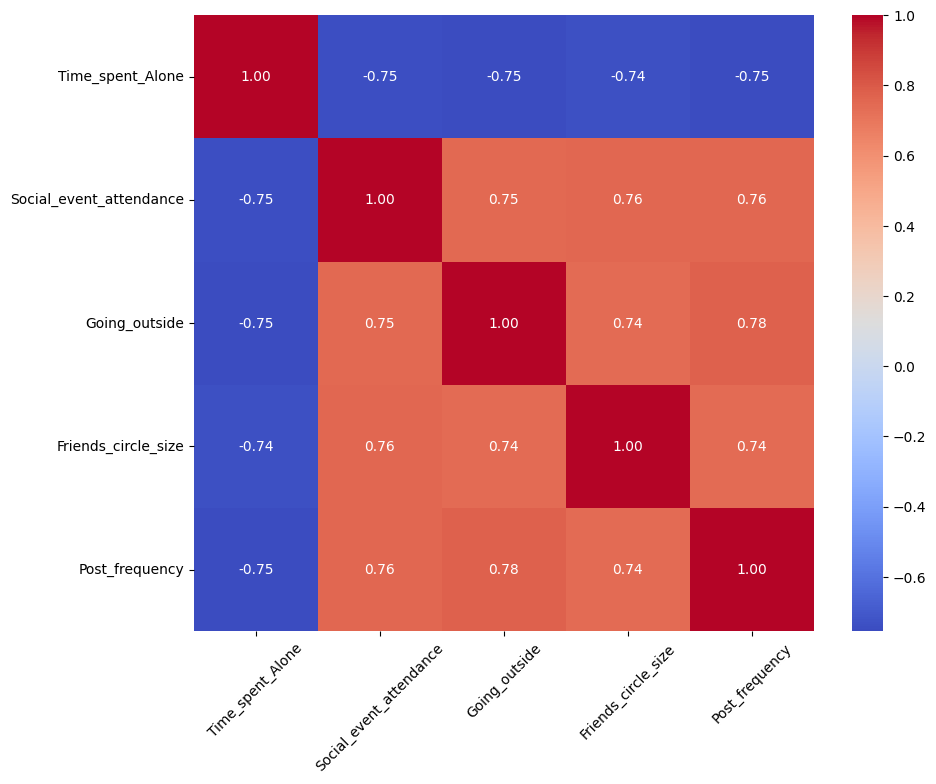

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.show

## 05.2 Personality corellation to Friends_circle_size

<Axes: xlabel='Personality', ylabel='Friends_circle_size'>

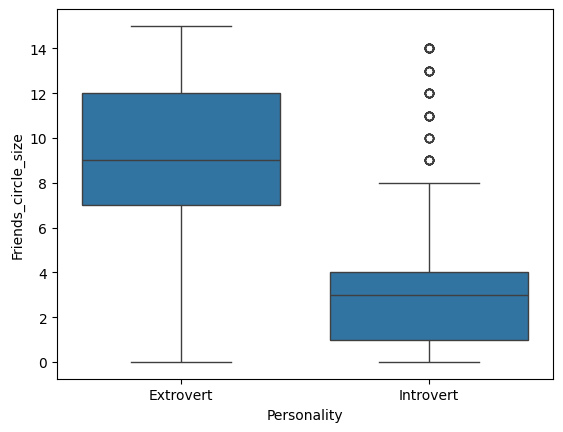

In [17]:
sns.boxplot(data=df_personality, x="Personality", y="Friends_circle_size")

In [18]:
introverts_only = df_personality[df_personality['Personality'] == 'Introvert']
introverts_only.shape

(1409, 8)

In [19]:
introvert_outliners = df_personality[(df_personality['Friends_circle_size'] >= 8) & (df_personality['Personality'] == 'Introvert')]
introvert_outliners.shape

(76, 8)

Conclusion: Out of 1409 introverts 76 have Friends circle size above 8.

## 05.3 Time_spent_Alone correlation to Personality

<Axes: xlabel='Personality', ylabel='Time_spent_Alone'>

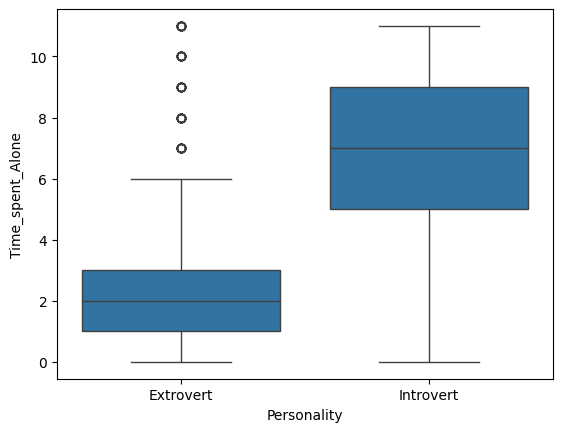

In [20]:
sns.boxplot(data=df_personality, x='Personality', y='Time_spent_Alone')

Conclusion: Introverts tend to spend more time alone than extroverts and have a larger spread in their time spent alone, which matches the expected behavior pattern.

## 05.4 Friends_circle_size correlation to Social_event_attendance

<Axes: xlabel='Friends_circle_size', ylabel='Social_event_attendance'>

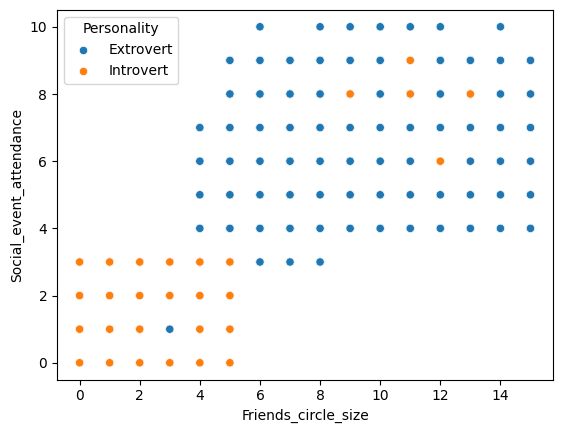

In [21]:
sns.scatterplot(data=df_personality, x='Friends_circle_size', y='Social_event_attendance', hue='Personality')

Conclusion: Extroverts tend to be more socially active and have larger social circles than introverts.

## 05.5 Post_frequency correlation to Personality

<Axes: xlabel='Post_frequency', ylabel='Count'>

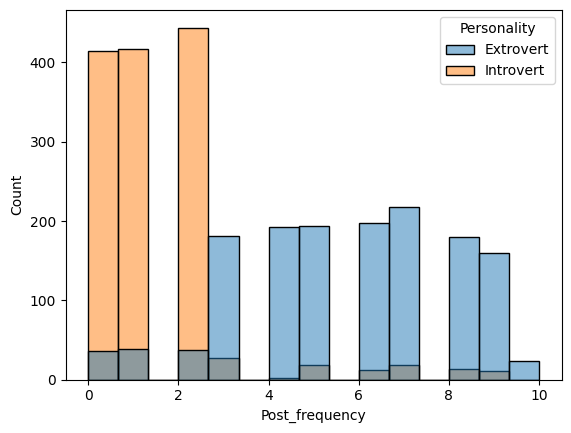

In [22]:
sns.histplot(data=df_personality, x='Post_frequency', hue='Personality')

Conclusion: Most introverts post infrequently, while extroverts show a broader and more evenly distributed posting frequency that extends beyond the range typical for introverts.